## Observations and Insights 

In [322]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df=pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID") 

merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [323]:
# Checking the number of mice in the DataFrame.
unique_pmouse = merged_df["Mouse ID"].nunique()

print(unique_pmouse)

249


In [324]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#  DataFrame.duplicated(self, subset: Union[Hashable, Sequence[Hashable], NoneType] = None, keep: Union[str, bool] = 'first') → ’Series
merged_df.loc[merged_df.duplicated(subset = ["Mouse ID", "Timepoint"])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [325]:
# Optional: Get all the data for the duplicate mouse ID. 


In [326]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#  DataFrame.drop_duplicates(subset=None, keep=’first’, inplace=False)

merged_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"], keep ='first', inplace = True)


In [327]:
# Checking the number of mice in the clean DataFrame.
unique_pmouse = merged_df["Mouse ID"].nunique()

print(unique_pmouse)

249


## Summary Statistics

In [328]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped_drugreg_df = merged_df.groupby(["Drug Regimen"])

avg_drug = grouped_drugreg_df["Tumor Volume (mm3)"].mean()
avg_drug.head()
median_drug = grouped_drugreg_df["Tumor Volume (mm3)"].median()
median_drug.head()
var_drug = grouped_drugreg_df["Tumor Volume (mm3)"].var()
var_drug.head()
std_drug = grouped_drugreg_df["Tumor Volume (mm3)"].std()
std_drug.head()
sem_drug = grouped_drugreg_df["Tumor Volume (mm3)"].sem()
sem_drug.head()
 
drugstats_df = pd.DataFrame({"Mean":avg_drug, "Median":median_drug,"Standard Deviation": std_drug, "Variance":var_drug, "SEM":sem_drug})
drugstats_df


# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.393463,50.909965,6.568014,43.138803,0.525862
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [329]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped_drugreg_df.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

# This method produces everything in a single groupby function.

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

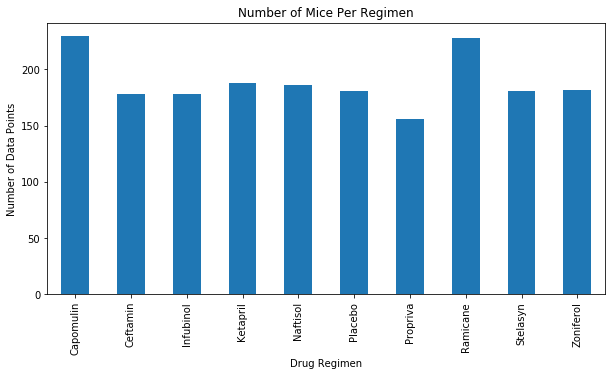

<Figure size 432x288 with 0 Axes>

In [330]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

#Groupby drug regimen with .count and mouse id to determine the datapoints
BarPlot_df = merged_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
BarPlot_df

# Generate a bar plot showing number of data points for each treatment regimen using pandas
BarPlot_df.plot(kind="bar", figsize=(10,5))

#set chart title
plt.title("Number of Mice Per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

#show chart and set layout
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Datapoints')

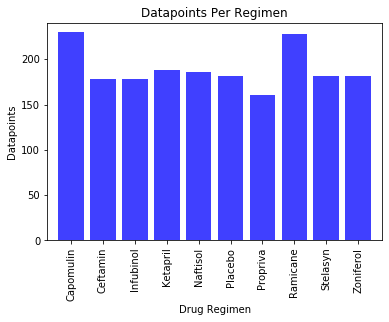

In [331]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.


#Create an arraw with the datapoints
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(BarPlot_df))

plt.bar(x_axis, users, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("Datapoints Per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Datapoints")

## Pie Plots

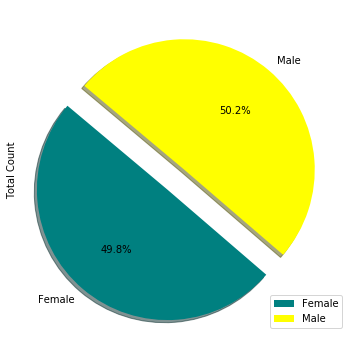

In [332]:
# Generate a pie plot showing the distribution of female vs male mice using pandas

# Start by grouping sex w/ sex & mouse ID
groupby_sex = merged_df.groupby(["Mouse ID","Sex"])
groupby_sex

# Syntax: dataframe.size
# Return : Returns size of dataframe/series which is equivalent to total number of elements. That is rows x columns.
mouse_sex_df = pd.DataFrame(groupby_sex.size())

# Create the df with total count of Female and Male mice
#  use groupby by sex to count the amount of males and female mice 
final_mouse_sex = pd.DataFrame(mouse_sex_df.groupby(["Sex"]).count())
final_mouse_sex.columns = ["Total Count"]

# format the % of female vs male
final_mouse_sex["Percentage of Sex"] = (100*(final_mouse_sex["Total Count"]/final_mouse_sex["Total Count"].sum()))

# format the "Percentage of Sex" column
final_mouse_sex["Percentage of Sex"] = final_mouse_sex["Percentage of Sex"]
# Run to check code 
final_mouse_sex

# Generate a pie plot showing the distribution of female versus male mice using pandas 
#plot = name of the data frame .plot.pie (sumplots true)
colors = ['teal', 'yellow']
explode = (0.2, 0)
plot = mouse_gender.plot.pie(y="Total Count",figsize=(6,6), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

(-1.2559359259797993,
 1.1149942876470889,
 -1.2787738330817018,
 1.1164143572269714)

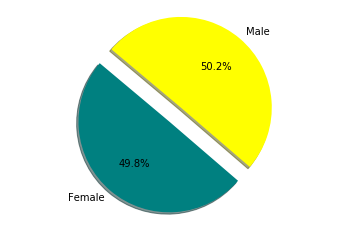

In [333]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.8,50.2]

#Set colors for each section of the pie
colors = ["teal", "yellow"]

#Determoine which section of the circle to detach
explode = (0.2, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Set equal axis
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [334]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Extract the top 4 regimenes from the DataFrame in order to find IQR
# The isin() function is used to check each element in the DataFrame is contained in values or not. 
FOUR_protocols = merged_df[merged_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
FOUR_protocols = FOUR_protocols.sort_values(["Timepoint"], ascending=True)

#Run to check 
FOUR_protocols

# Organize DataFrame w/ columns neccessary 
FOUR_protocols_df = FOUR_protocols[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
# Run to check 
FOUR_protocols_df

#Group data by protocol drug and Mouse ID to capture Last Tumor Measurement
FOUR_protocols_org_df = FOUR_protocols_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
#Run to check 
FOUR_protocols_org_df.head()

# Update organized dataframe to manipulate data 
FOUR_protocols_df = FOUR_protocols_org_df.to_frame()
# FOUR_protocols_df


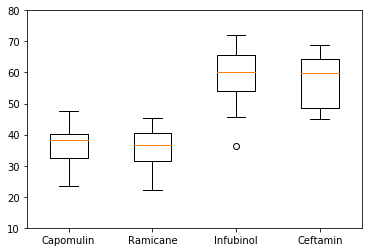

In [335]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Create a list to use as labels and dataframe
ALL_FOUR = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
complete_df = FOUR_protocols_df.reset_index()
tumor_lists = FOUR_protocols_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(ALL_FOUR)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]

# Display boxplot             
plt.boxplot(tumor_vols, labels=ALL_FOUR)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

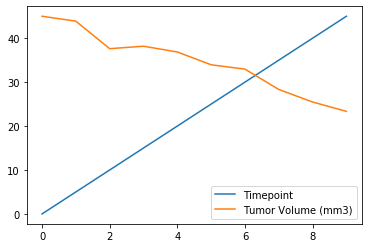

In [336]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

time_vs_tumorvol = merged_df[merged_df["Mouse ID"].isin(["s185"])]
#run to check
time_vs_tumorvol


# update data with neccessary variables for line plot 
time_vs_tumorvol_df = time_vs_tumorvol[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
#run to check
time_vs_tumorvol_df

# Reset index 
# .reset_index() this method can remove one or more levels
LinePlot_df = time_vs_tumorvol_df.reset_index()
#run to check 
LinePlot_df

# Finalize Line plot w/ mouse ID, timepoint and tumor volume 
Final_LinePlot_df = LinePlot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
Final_LinePlot_df

# display line plot
lines = Final_LinePlot_df.plot.line()

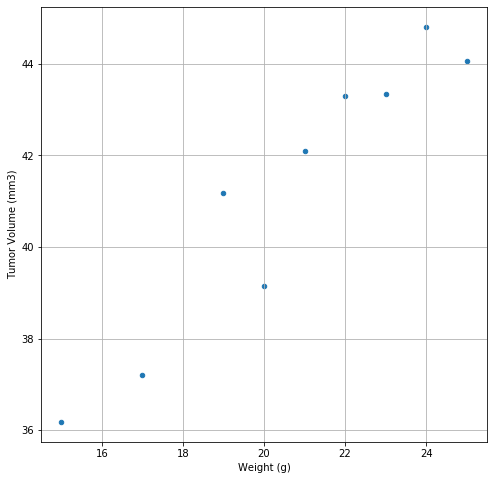

In [337]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#  extract specific data i.e. all capomulin from "drug regimen"
scatter_capo = merged_df[merged_df["Drug Regimen"].isin(["Capomulin"])]

# Begin to draft dataframe with specific mouse (mouse id), its weight, and tumor volume 
capomulin_scatter_df = FOUR_protocols[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

#  Sort by the values along  axis
sorted_scatter_capo = scatter_capo.sort_values(["Weight (g)"], ascending=True)

#  reset index
#  reset_index() method sets a list of integer ranging from 0 to length of data as index.
scatter_plot_capo = scatter_capo.reset_index()

# being scatter plot by groupby the axis' weight & tumor volume mean
capomulin_grouped_weight = scatter_plot_capo.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

#  set dataframe
capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()


capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))
# capomulin_scatter


## Correlation and Regression

The r-squared is: 0.9034966277438602


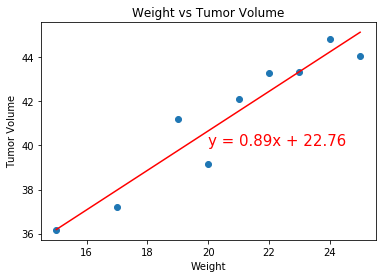

In [341]:
# Calculate the correlation coefficient and linear regression model 
# Create axis 
#  Refer to 05, D3, Act 9 for base code 

x_values = capo_grouped_plot["Weight (g)"]
y_values = capo_grouped_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
plt.title("Weight vs Tumor Volume")
plt.show() 


